In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.stats import gaussian_kde

In [2]:
with h5py.File('../../sav/SPICE/upflow_region/west_upflow_violin_spice.h5','r') as hdul:
    spice_NeVIII_vel_eis_upflow_region_west = hdul['ne_8_770_vel'][:]
    spice_NeVIII_int_eis_upflow_region_west = hdul['ne_8_770_int'][:]
    spice_OIII_int_eis_upflow_region_west = hdul['o_3_703_int'][:]
    spice_MgIX_int_eis_upflow_region_west = hdul['mg_9_706_int'][:]
    spice_NIV_int_eis_upflow_region_west = hdul['n_4_765_int'][:]
    hri_int_eis_upflow_region_west = hdul['hri_int'][:]

In [3]:
with h5py.File('../../sav/SPICE/upflow_region/east_upflow_violin_spice.h5','r') as hdul:
    spice_NeVIII_vel_eis_upflow_region_east = hdul['ne_8_770_vel'][:]
    spice_NeVIII_int_eis_upflow_region_east = hdul['ne_8_770_int'][:]
    spice_OIII_int_eis_upflow_region_east = hdul['o_3_703_int'][:]
    spice_MgIX_int_eis_upflow_region_east = hdul['mg_9_706_int'][:]
    spice_NIV_int_eis_upflow_region_east = hdul['n_4_765_int'][:]
    hri_int_eis_upflow_region_east = hdul['hri_int'][:]

In [4]:
with h5py.File('../../sav/SPICE/upflow_region/east_moss_violin_spice.h5','r') as hdul:
    spice_NeVIII_int_moss_ref_region = hdul['ne_8_770_int'][:]
    spice_OIII_int_moss_ref_region = hdul['o_3_703_int'][:]
    spice_MgIX_int_moss_ref_region = hdul['mg_9_706_int'][:]
    spice_NIV_int_moss_ref_region = hdul['n_4_765_int'][:]
    hri_int_moss_ref_region = hdul['hri_int'][:]

In [13]:
def calc_and_plot_kde(data, ax, color, label):
    data = data[np.isfinite(data)]
    kde = gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), 100)
    ax.plot(kde(x),x, color=color, label=label)
    ax.fill_betweenx(x, 0, kde(x), color=color, alpha=0.5)
    return kde

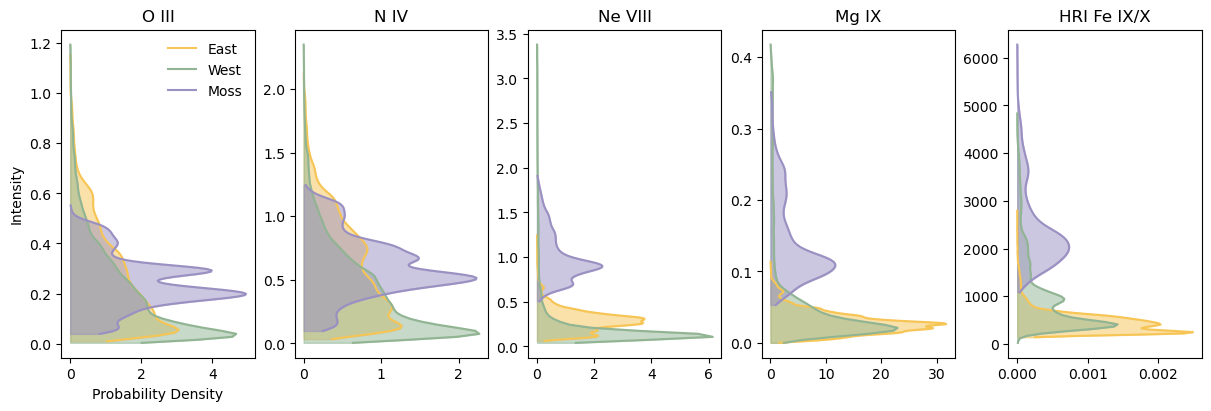

In [22]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(12, 4),layout='constrained')

calc_and_plot_kde(spice_OIII_int_eis_upflow_region_east, ax1, color='#F6C555', label='East')
calc_and_plot_kde(spice_OIII_int_eis_upflow_region_west, ax1, color='#91B493', label='West')
calc_and_plot_kde(spice_OIII_int_moss_ref_region, ax1, color='#9B90C2', label='Moss')

calc_and_plot_kde(spice_NIV_int_eis_upflow_region_east, ax2, color='#F6C555', label='East')
calc_and_plot_kde(spice_NIV_int_eis_upflow_region_west, ax2, color='#91B493', label='West')
calc_and_plot_kde(spice_NIV_int_moss_ref_region, ax2, color='#9B90C2', label='Moss')

calc_and_plot_kde(spice_NeVIII_int_eis_upflow_region_east, ax3, color='#F6C555', label='East')
calc_and_plot_kde(spice_NeVIII_int_eis_upflow_region_west, ax3, color='#91B493', label='West')
calc_and_plot_kde(spice_NeVIII_int_moss_ref_region, ax3, color='#9B90C2', label='Moss')

calc_and_plot_kde(spice_MgIX_int_eis_upflow_region_east, ax4, color='#F6C555', label='East')
calc_and_plot_kde(spice_MgIX_int_eis_upflow_region_west, ax4, color='#91B493', label='West')
calc_and_plot_kde(spice_MgIX_int_moss_ref_region, ax4, color='#9B90C2', label='Moss')

calc_and_plot_kde(hri_int_eis_upflow_region_east, ax5, color='#F6C555', label='East')
calc_and_plot_kde(hri_int_eis_upflow_region_west, ax5, color='#91B493', label='West')
calc_and_plot_kde(hri_int_moss_ref_region, ax5, color='#9B90C2', label='Moss')

ax1.set_ylabel('Intensity')
ax1.set_xlabel('Probability Density')

ax1.set_title('O III')
ax2.set_title('N IV')
ax3.set_title('Ne VIII')
ax4.set_title('Mg IX')
ax5.set_title('HRI Fe IX/X')

ax1.legend(loc='upper right', frameon=False)